In [4]:
import pandas as pd

df = pd.read_csv("good_bad_crop_choices.csv")

df.head()

,province,district,zone,soil_type,rainfall_mm,temperature_c,pH,season,shade,chosen_crop,good_bad
0,North Central,Anuradhapura,Wet Zone,loamy,2803,30.2,6.9,Yala,yes,turmeric,1
1,North Central,Anuradhapura,Wet Zone,loamy,2803,30.2,6.9,Yala,yes,paddy,0
2,North Central,Anuradhapura,Wet Zone,loamy,2803,30.2,6.9,Yala,yes,vegetables,0
3,Southern,Galle,Intermediate Zone,sandy_loam,984,26.8,4.9,Maha,yes,coconut,1
4,Southern,Galle,Intermediate Zone,sandy_loam,984,26.8,4.9,Maha,yes,rubber,0


In [6]:
# Check columns and types
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   province       45000 non-null  object 
 1   district       45000 non-null  object 
 2   zone           45000 non-null  object 
 3   soil_type      45000 non-null  object 
 4   rainfall_mm    45000 non-null  int64  
 5   temperature_c  45000 non-null  float64
 6   pH             45000 non-null  float64
 7   season         45000 non-null  object 
 8   shade          45000 non-null  object 
 9   chosen_crop    45000 non-null  object 
 10  good_bad       45000 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 3.8+ MB


province         0
district         0
zone             0
soil_type        0
rainfall_mm      0
temperature_c    0
pH               0
season           0
shade            0
chosen_crop      0
good_bad         0
dtype: int64

In [7]:
df["good_bad"].value_counts(normalize=True)


good_bad
0    0.666667
1    0.333333
Name: proportion, dtype: float64

In [10]:
# X = all other columns except target
X = df.drop(columns=["good_bad"])

# y = target column
y = df["good_bad"]

X.head(), y.head()

(        province      district               zone   soil_type  rainfall_mm  \
 0  North Central  Anuradhapura           Wet Zone       loamy         2803   
 1  North Central  Anuradhapura           Wet Zone       loamy         2803   
 2  North Central  Anuradhapura           Wet Zone       loamy         2803   
 3       Southern         Galle  Intermediate Zone  sandy_loam          984   
 4       Southern         Galle  Intermediate Zone  sandy_loam          984   
 
    temperature_c   pH season shade chosen_crop  
 0           30.2  6.9   Yala   yes    turmeric  
 1           30.2  6.9   Yala   yes       paddy  
 2           30.2  6.9   Yala   yes  vegetables  
 3           26.8  4.9   Maha   yes     coconut  
 4           26.8  4.9   Maha   yes      rubber  ,
 0    1
 1    0
 2    0
 3    1
 4    0
 Name: good_bad, dtype: int64)

In [11]:
# List columns manually based on your dataset

categorical_features = [
    "province",
    "district",
    "zone",
    "soil_type",
    "season",
    "shade",
    "chosen_crop"
]

numerical_features = [
    "rainfall_mm",
    "temperature_c",
    "pH"
]

print("Categorical:", categorical_features)
print("Numerical:", numerical_features)


Categorical: ['province', 'district', 'zone', 'soil_type', 'season', 'shade', 'chosen_crop']
Numerical: ['rainfall_mm', 'temperature_c', 'pH']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # keeps GOOD/BAD ratio balanced
)

X_train.shape, X_test.shape


((36000, 10), (9000, 10))

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numerical_features)
    ]
)


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss"  # prevents warning
    )
}


In [16]:
results = {}

for name, clf in models.items():
    print("\n===============================")
    print(f"Training: {name}")
    print("===============================")

    # Build pipeline for each model
    model = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("classifier", clf)
    ])

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Store model for later use
    results[name] = model

    # Print classification report
    print(classification_report(y_test, y_pred))



Training: Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.91      0.81      6000
           1       0.63      0.30      0.41      3000

    accuracy                           0.71      9000
   macro avg       0.68      0.61      0.61      9000
weighted avg       0.69      0.71      0.67      9000


Training: Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      6000
           1       0.71      0.72      0.72      3000

    accuracy                           0.81      9000
   macro avg       0.78      0.79      0.79      9000
weighted avg       0.81      0.81      0.81      9000


Training: Random Forest
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      6000
           1       0.93      0.65      0.76      3000

    accuracy                           0.86      9000
   macro avg       0.89      0.81      0.83    

Training: Logistic Regression
Training: Decision Tree
Training: Random Forest
Training: XGBoost


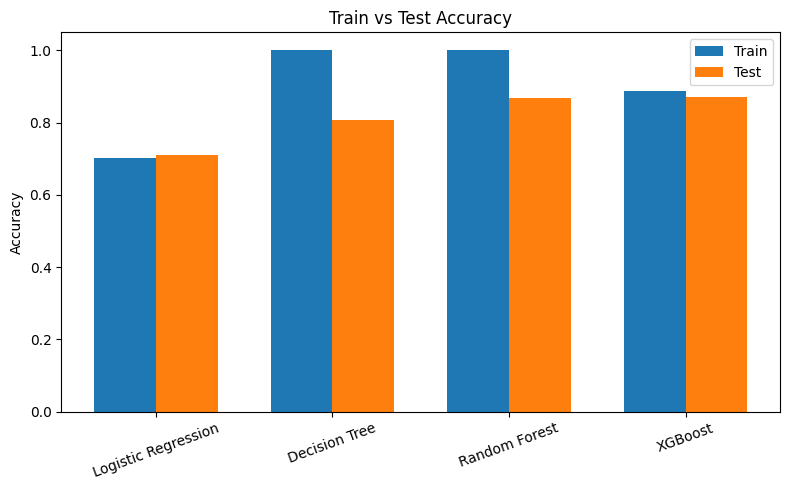

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

model_names = []
train_accuracies = []
test_accuracies = []

for name, clf in models.items():
    print(f"Training: {name}")

    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("classifier", clf)
    ])

    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    model_names.append(name)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# ---- Plot graph ----
x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_accuracies, width, label="Train")
plt.bar(x + width/2, test_accuracies, width, label="Test")

plt.xticks(x, model_names, rotation=20)
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
from sklearn.metrics import accuracy_score

best_name = None
best_acc = -1
best_model = None

for name, model in results.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Test Accuracy = {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_name = name
        best_model = model

print("\nBest model:", best_name)
print("Best accuracy:", best_acc)


Logistic Regression: Test Accuracy = 0.7092
Decision Tree: Test Accuracy = 0.8074
Random Forest: Test Accuracy = 0.8670
XGBoost: Test Accuracy = 0.8709

Best model: XGBoost
Best accuracy: 0.8708888888888889


In [20]:
results[name] = model

best_name = "XGBoost"
best_model = results[best_name]

print("Selected best model:", best_name)



Selected best model: XGBoost


In [22]:
import joblib

model_file = "crop_choice_xgboost_model.joblib"

joblib.dump(best_model, model_file)

print(f"Saved XGBoost pipeline to {model_file}")


features_names = X.columns.tolist()
joblib.dump(features_names, "features_names.joblib")
print("✅ Feature names saved as features_names.joblib")



Saved XGBoost pipeline to crop_choice_xgboost_model.joblib
✅ Feature names saved as features_names.joblib


In [23]:
import joblib
import pandas as pd

model = joblib.load("crop_choice_xgboost_model.joblib")  # or your actual filename
print("Model loaded.")


Model loaded.


In [25]:
sample_input = {
    "province": "North Central",
    "district": "Anuradhapura",
    "zone": "Wet Zone",
    "soil_type": "loamy",
    "rainfall_mm": 2800,
    "temperature_c": 30.0,
    "pH": 6.8,
    "season": "Yala",
    "shade": "yes",
    "chosen_crop": "apple"   # try changing this to a wrong crop later
}

# Convert dict → DataFrame with one row
sample_df = pd.DataFrame([sample_input])

sample_df

# Predict class (0 = BAD, 1 = GOOD)
pred_class = model.predict(sample_df)[0]

# Predict probabilities [prob_bad, prob_good]
if hasattr(model, "predict_proba"):
    proba = model.predict_proba(sample_df)[0]
    prob_bad = proba[0]
    prob_good = proba[1]
else:
    prob_bad = prob_good = None

label_map = {0: "BAD", 1: "GOOD"}
pred_label = label_map.get(pred_class, "UNKNOWN")

print(f"Prediction: {pred_label} ({pred_class})")
if prob_good is not None:
    print(f"Probability GOOD: {prob_good:.4f}")
    print(f"Probability BAD : {prob_bad:.4f}")




Prediction: BAD (0)
Probability GOOD: 0.1366
Probability BAD : 0.8634
